#### Importing Library

In [1]:
# Import necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis

import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for statistical data visualization

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Scikit-learn for machine learning metrics
from sklearn.ensemble import RandomForestClassifier  # Scikit-learn for RandomForestClassifier model


In [2]:
# Ignore warning messages to enhance code readability
import warnings
warnings.filterwarnings('ignore')

#### Data Gathering

In [3]:
# Set Pandas options to display all rows in the output
pd.set_option('display.max_rows', None)

# Set Pandas options to display all columns in the output
pd.set_option('display.max_columns', None)

In [4]:
# Read a CSV file into a Pandas DataFrame
df = pd.read_csv('Datasets.csv')

# Display the first few rows of the DataFrame to inspect the loaded data
df.head()

,ID,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,10.42.0.211-104.97.95.172-59522-80-6,192.168.2.112,2142,75.126.101.175,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,216.58.217.68-10.42.0.211-443-59345-6,147.32.84.170,2108,208.100.48.73,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1
2,10.42.0.151-54.192.38.7-52510-443-6,147.32.84.170,3805,125.14.233.194,22,1,0.00,1.500000,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
3,216.58.219.206-10.42.0.42-443-53294-6,147.32.84.180,3008,205.188.146.193,25,1,2.96,2.021923,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
4,10.42.0.1-10.42.0.42-53-62597-17,147.32.84.160,11697,184.173.217.40,443,1,0.15,0.159373,0,0.000000,96,0,0.00000,40,0,2,1,0.500000,1


#### EDA

In [5]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(5472, 19)

In [6]:
df.head()

,ID,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,10.42.0.211-104.97.95.172-59522-80-6,192.168.2.112,2142,75.126.101.175,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,216.58.217.68-10.42.0.211-443-59345-6,147.32.84.170,2108,208.100.48.73,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1
2,10.42.0.151-54.192.38.7-52510-443-6,147.32.84.170,3805,125.14.233.194,22,1,0.00,1.500000,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
3,216.58.219.206-10.42.0.42-443-53294-6,147.32.84.180,3008,205.188.146.193,25,1,2.96,2.021923,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
4,10.42.0.1-10.42.0.42-53-62597-17,147.32.84.160,11697,184.173.217.40,443,1,0.15,0.159373,0,0.000000,96,0,0.00000,40,0,2,1,0.500000,1


In [7]:
# Generate descriptive statistics of the DataFrame's numeric columns
df.describe()

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5.472000e+03,5472.000000,5.472000e+03,5.472000e+03,5.472000e+03,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,16649.802997,3544.247259,1.389072,12.964750,21.341809,317.964547,7.298220e+02,759.547332,1.300414e+04,1.322517e+04,1.315962e+04,462.317069,10.211075,11.732822,0.711110,0.629934
std,18265.060508,9404.524921,0.487584,305.059762,883.079233,3732.302430,1.863939e+04,6924.407943,1.847461e+05,1.312337e+05,1.880511e+05,17168.330107,104.135551,111.630205,0.601317,0.482866
min,53.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2690.000000,53.000000,1.000000,0.050000,0.218569,0.000000,2.875000e+01,80.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4840.500000,80.000000,1.000000,0.480000,1.500000,49.000000,5.604888e+01,120.000000,1.010000e+02,1.892578e+02,1.240000e+02,0.000000,2.000000,1.000000,0.833333,1.000000
75%,32245.000000,139.000000,2.000000,3.060000,7.583472,103.000000,1.414228e+02,361.250000,6.792500e+02,3.805434e+03,8.380000e+02,0.000000,6.000000,5.000000,1.000000,1.000000
max,65522.000000,65500.000000,2.000000,22083.710000,65178.233330,156289.000000,1.062472e+06,325674.000000,8.986288e+06,6.142982e+06,9.231445e+06,864072.000000,6561.000000,6510.000000,8.000000,1.000000


In [8]:
# Count the number of duplicated rows in the DataFrame
df.duplicated().sum()

0

In [9]:
# Display concise information about the DataFrame, including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5472 non-null   object 
 1   Sender_IP           5472 non-null   object 
 2   Sender_Port         5472 non-null   int64  
 3   Target_IP           5472 non-null   object 
 4   Target_Port         5472 non-null   int64  
 5   Transport_Protocol  5472 non-null   int64  
 6   Duration            5472 non-null   float64
 7   AvgDuration         5472 non-null   float64
 8   PBS                 5472 non-null   int64  
 9   AvgPBS              5472 non-null   float64
 10  TBS                 5472 non-null   int64  
 11  PBR                 5472 non-null   int64  
 12  AvgPBR              5472 non-null   float64
 13  TBR                 5472 non-null   int64  
 14  Missed_Bytes        5472 non-null   int64  
 15  Packets_Sent        5472 non-null   int64  
 16  Packet

In [10]:
# Display the column labels (names) of the DataFrame
df.columns

Index(['ID', 'Sender_IP', 'Sender_Port', 'Target_IP', 'Target_Port',
       'Transport_Protocol', 'Duration', 'AvgDuration', 'PBS', 'AvgPBS', 'TBS',
       'PBR', 'AvgPBR', 'TBR', 'Missed_Bytes', 'Packets_Sent',
       'Packets_Received', 'SRPR', 'class'],
      dtype='object')

In [11]:
# Count the number of missing values in each column of the DataFrame
df.isna().sum()

ID                    0
Sender_IP             0
Sender_Port           0
Target_IP             0
Target_Port           0
Transport_Protocol    0
Duration              0
AvgDuration           0
PBS                   0
AvgPBS                0
TBS                   0
PBR                   0
AvgPBR                0
TBR                   0
Missed_Bytes          0
Packets_Sent          0
Packets_Received      0
SRPR                  0
class                 0
dtype: int64

In [12]:
# Count the number of unique values in each column of the DataFrame
df.nunique()

ID                    5220
Sender_IP              279
Sender_Port           3975
Target_IP             1940
Target_Port            542
Transport_Protocol       2
Duration              1313
AvgDuration           1996
PBS                    692
AvgPBS                1473
TBS                   1073
PBR                   1476
AvgPBR                1506
TBR                   1531
Missed_Bytes           132
Packets_Sent           145
Packets_Received       163
SRPR                   376
class                    2
dtype: int64

In [13]:
# Calculate the pairwise correlation coefficients between numeric columns in the DataFrame
df.corr()

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
Sender_Port,1.000000,0.124804,0.513542,-0.011907,-0.012241,0.015047,-0.008215,-0.025016,-0.044665,-0.064701,-0.043742,0.009802,-0.045337,-0.053972,-0.123383,0.042804
Target_Port,0.124804,1.000000,0.331738,0.030885,0.013210,0.173476,0.079277,0.128563,-0.010766,-0.000513,-0.018215,0.018282,0.012791,-0.012357,0.061065,-0.401458
Transport_Protocol,0.513542,0.331738,1.000000,-0.001063,-0.008008,-0.004522,-0.016184,-0.047389,-0.054726,-0.076553,-0.054312,-0.021492,-0.056919,-0.068994,-0.009993,-0.272599
Duration,-0.011907,0.030885,-0.001063,1.000000,0.989114,0.039593,0.019872,0.055096,0.006106,0.007366,0.005686,0.010464,0.053390,0.045934,0.006198,-0.037100
AvgDuration,-0.012241,0.013210,-0.008008,0.989114,1.000000,0.023335,0.018573,0.049155,0.001236,0.004430,0.001633,0.001764,0.048949,0.042133,0.005702,-0.024742
PBS,0.015047,0.173476,-0.004522,0.039593,0.023335,1.000000,0.116544,0.750853,0.009603,0.011466,0.009232,0.005377,0.071862,0.043168,0.021483,-0.036707
AvgPBS,-0.008215,0.079277,-0.016184,0.019872,0.018573,0.116544,1.000000,0.082973,0.021932,0.182985,-0.000047,0.235134,0.028416,0.006953,0.030487,-0.015457
TBS,-0.025016,0.128563,-0.047389,0.055096,0.049155,0.750853,0.082973,1.000000,0.575823,0.517525,0.571466,0.049074,0.655166,0.516409,0.052335,-0.008202
PBR,-0.044665,-0.010766,-0.054726,0.006106,0.001236,0.009603,0.021932,0.575823,1.000000,0.910757,0.994614,0.091075,0.942467,0.943154,0.089188,0.007723
AvgPBR,-0.064701,-0.000513,-0.076553,0.007366,0.004430,0.011466,0.182985,0.517525,0.910757,1.000000,0.895541,0.090750,0.847780,0.856620,0.086704,0.000221


In [14]:
# Count the occurrences of each unique value in the "class" column (target column)
df["class"].value_counts()

1    3447
0    2025
Name: class, dtype: int64

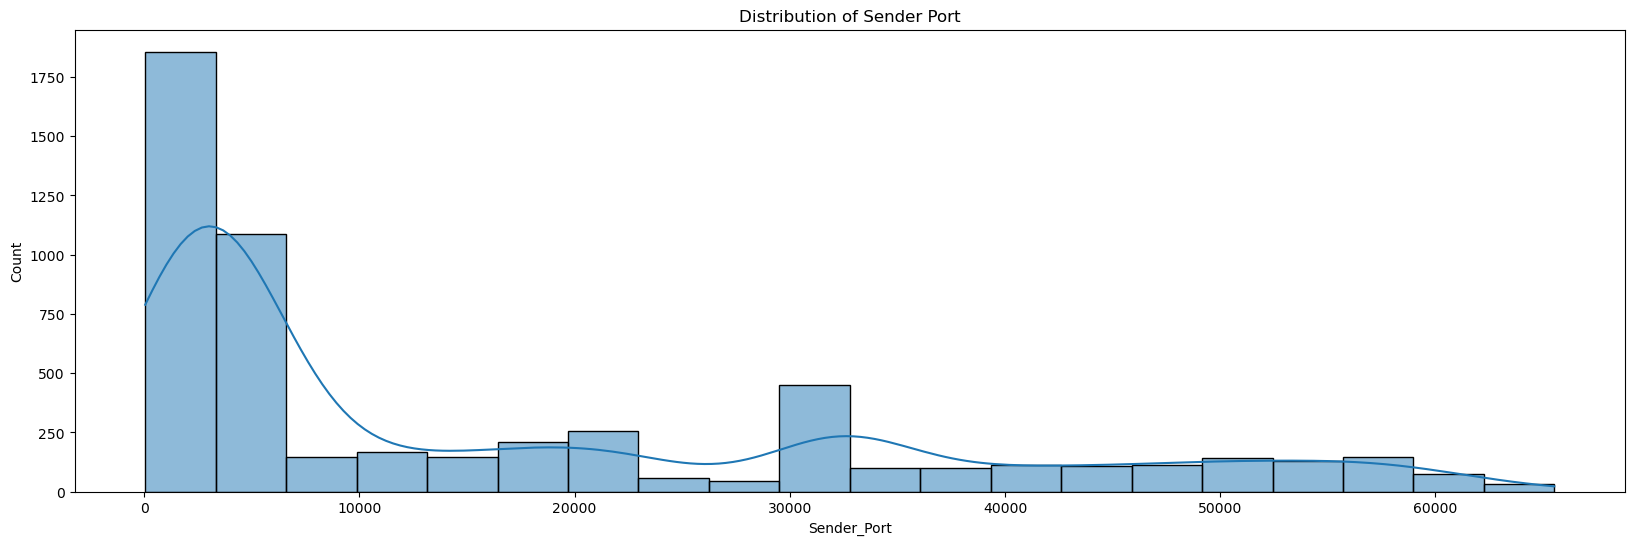

In [15]:
# Create a histogram plot for the distribution of values in the "Sender_Port" column

plt.figure(figsize=(20, 6))  # Set the figure size for better visualization
sns.histplot(df, x='Sender_Port', bins=20, kde=True)  # Use Seaborn to create a histogram with kernel density estimation
plt.title('Distribution of Sender Port')  # Set the title of the plot
plt.show()  # Display the plot

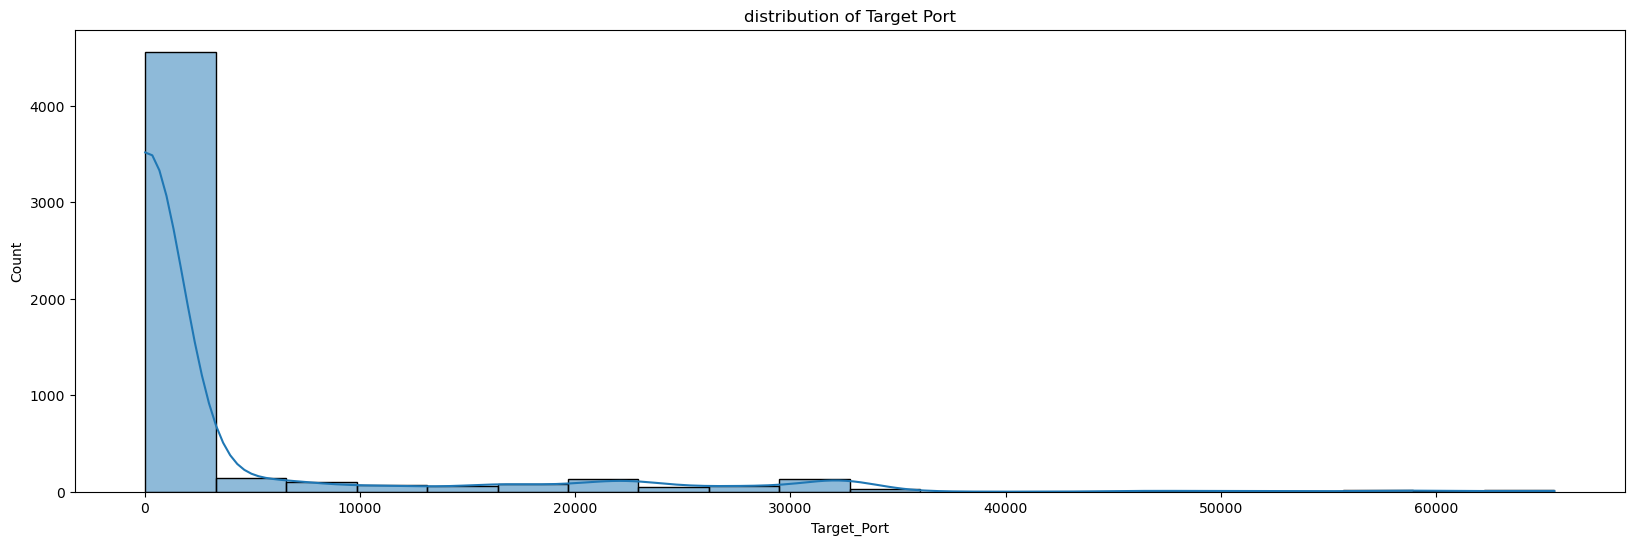

In [16]:
plt.figure(figsize=(20,6))
sns.histplot(df, x = 'Target_Port',bins = 20, kde = True)
plt.title('distribution of Target Port')
plt.show()

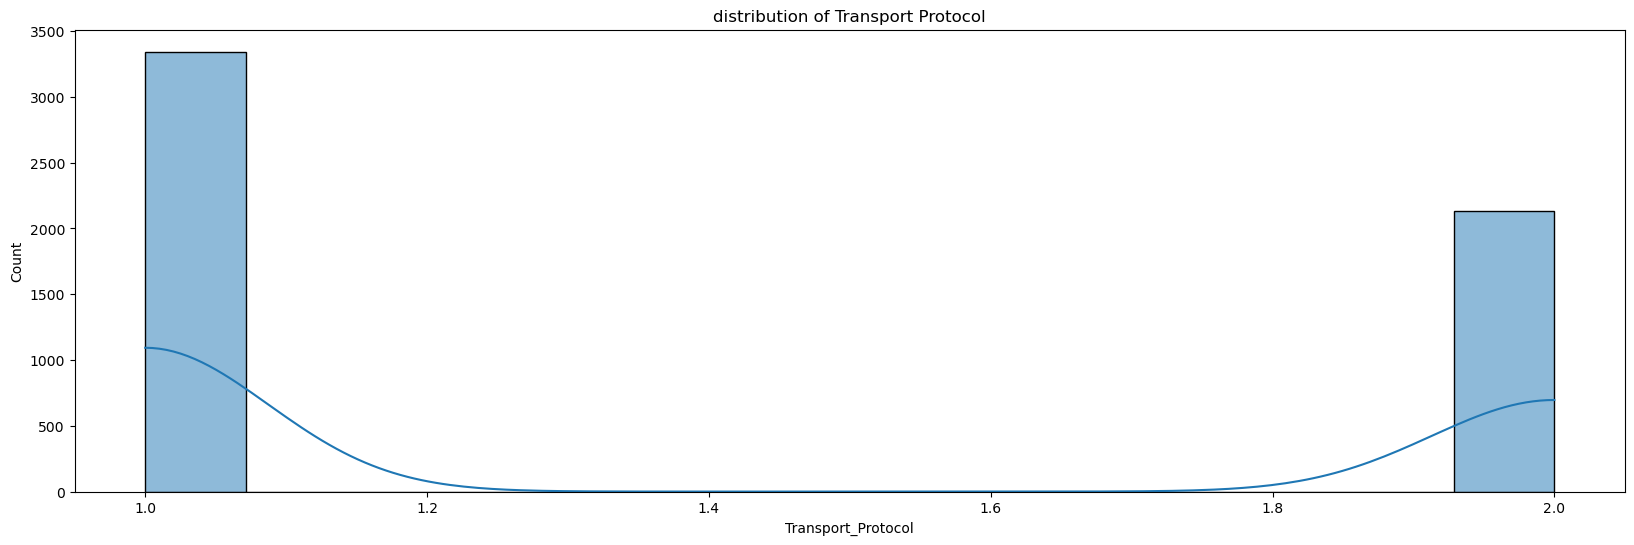

In [17]:
plt.figure(figsize=(20,6))
sns.histplot(df, x = 'Transport_Protocol', kde = True)
plt.title('distribution of Transport Protocol')
plt.show()

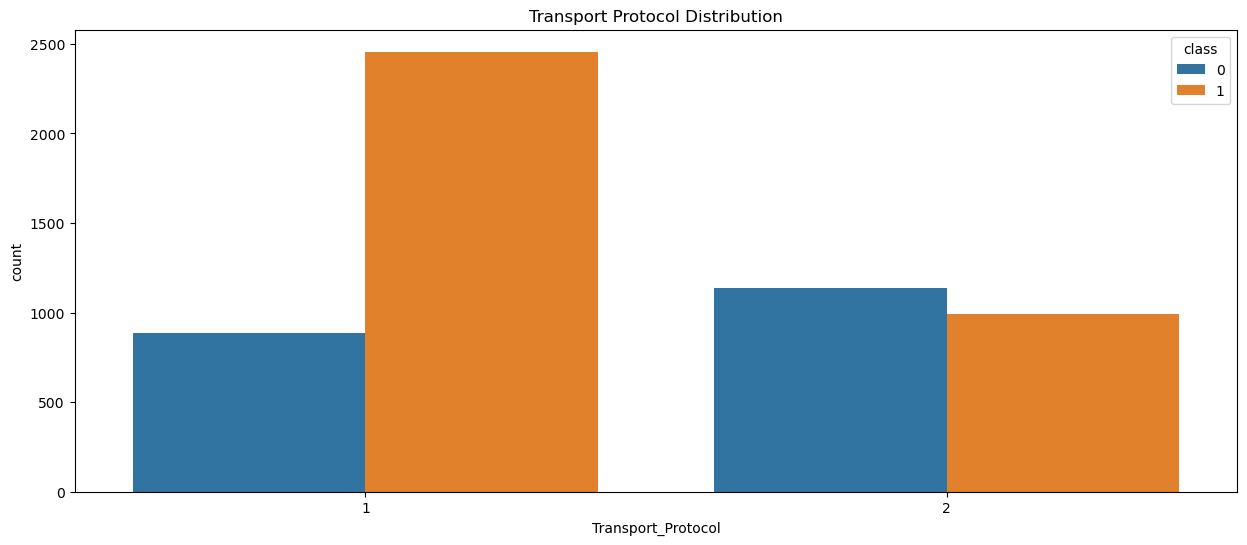

In [18]:
# Create a count plot for the distribution of "Transport_Protocol" with respect to the target variable "class"

plt.figure(figsize=(15, 6))  # Set the figure size for better visualization
sns.countplot(data=df, x="Transport_Protocol", hue="class")  # Use Seaborn to create a count plot with hue for target variable
plt.title("Transport Protocol Distribution")  # Set the title of the plot
plt.show()  # Display the plot

In [19]:
# Find the minimum and maximum values in the "Duration" column
df['Duration'].min(), df['Duration'].max()

(0.0, 22083.71)

In [20]:
df['AvgDuration'].min(),df['AvgDuration'].max()

(0.0, 65178.23333)

In [21]:
df['PBS'].min(),df['PBS'].max()

(0, 156289)

In [22]:
df['AvgPBS'].min(),df['AvgPBS'].max()

(0.0, 1062471.727)

In [23]:
df.head()

,ID,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,10.42.0.211-104.97.95.172-59522-80-6,192.168.2.112,2142,75.126.101.175,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,216.58.217.68-10.42.0.211-443-59345-6,147.32.84.170,2108,208.100.48.73,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1
2,10.42.0.151-54.192.38.7-52510-443-6,147.32.84.170,3805,125.14.233.194,22,1,0.00,1.500000,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
3,216.58.219.206-10.42.0.42-443-53294-6,147.32.84.180,3008,205.188.146.193,25,1,2.96,2.021923,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
4,10.42.0.1-10.42.0.42-53-62597-17,147.32.84.160,11697,184.173.217.40,443,1,0.15,0.159373,0,0.000000,96,0,0.00000,40,0,2,1,0.500000,1


In [24]:
df['TBS'].min(),df['TBS'].max()

(0, 325674)

In [25]:
df['PBR'].min(),df['PBR'].max()

(0, 8986288)

In [26]:
df['AvgPBR'].min(),df['AvgPBR'].max()

(0.0, 6142982.0)

In [27]:
df['TBR'].min(),df['TBR'].max()

(0, 9231445)

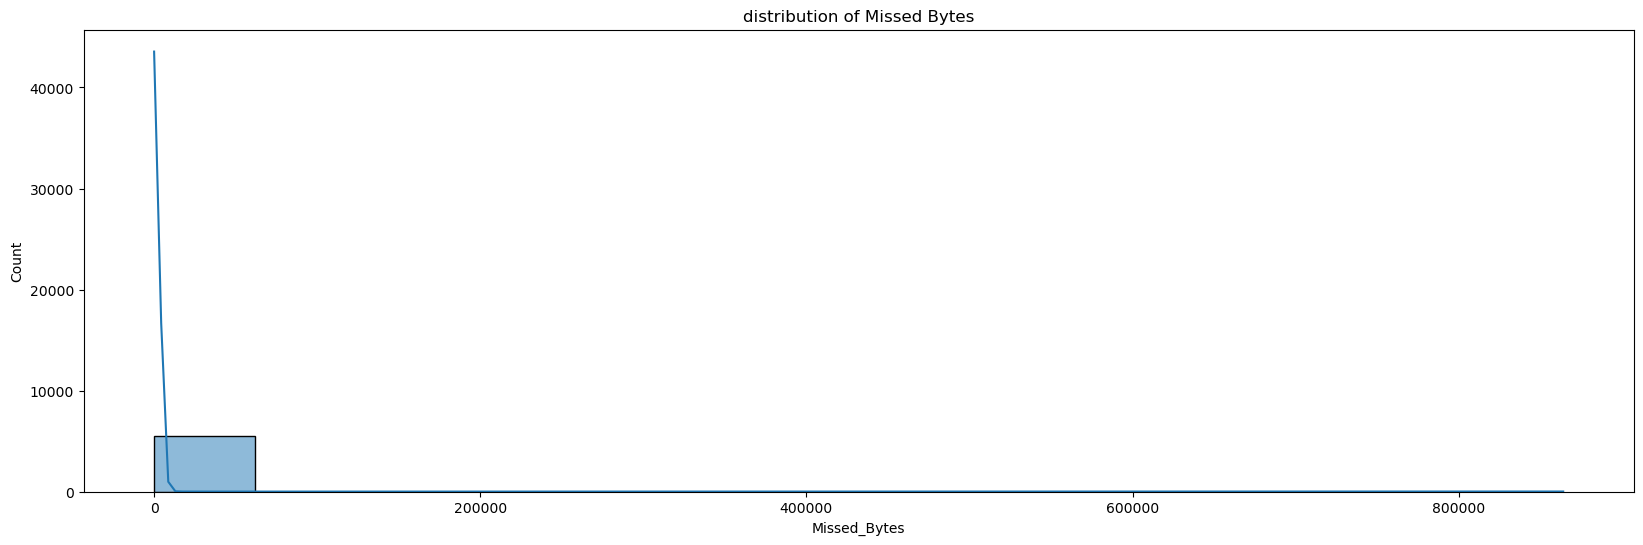

In [28]:
plt.figure(figsize=(20,6))
sns.histplot(df, x = 'Missed_Bytes', kde = True)
plt.title('distribution of Missed Bytes')
plt.show()

In [29]:
df.head()

,ID,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,10.42.0.211-104.97.95.172-59522-80-6,192.168.2.112,2142,75.126.101.175,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,216.58.217.68-10.42.0.211-443-59345-6,147.32.84.170,2108,208.100.48.73,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1
2,10.42.0.151-54.192.38.7-52510-443-6,147.32.84.170,3805,125.14.233.194,22,1,0.00,1.500000,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
3,216.58.219.206-10.42.0.42-443-53294-6,147.32.84.180,3008,205.188.146.193,25,1,2.96,2.021923,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
4,10.42.0.1-10.42.0.42-53-62597-17,147.32.84.160,11697,184.173.217.40,443,1,0.15,0.159373,0,0.000000,96,0,0.00000,40,0,2,1,0.500000,1


In [30]:
df['Packets_Sent'].min(),df['Packets_Sent'].max()

(0, 6561)

In [31]:
df['Packets_Received'].min(),df['Packets_Received'].max()

(0, 6510)

In [32]:
df['SRPR'].min(),df['SRPR'].max()

(0.0, 8.0)

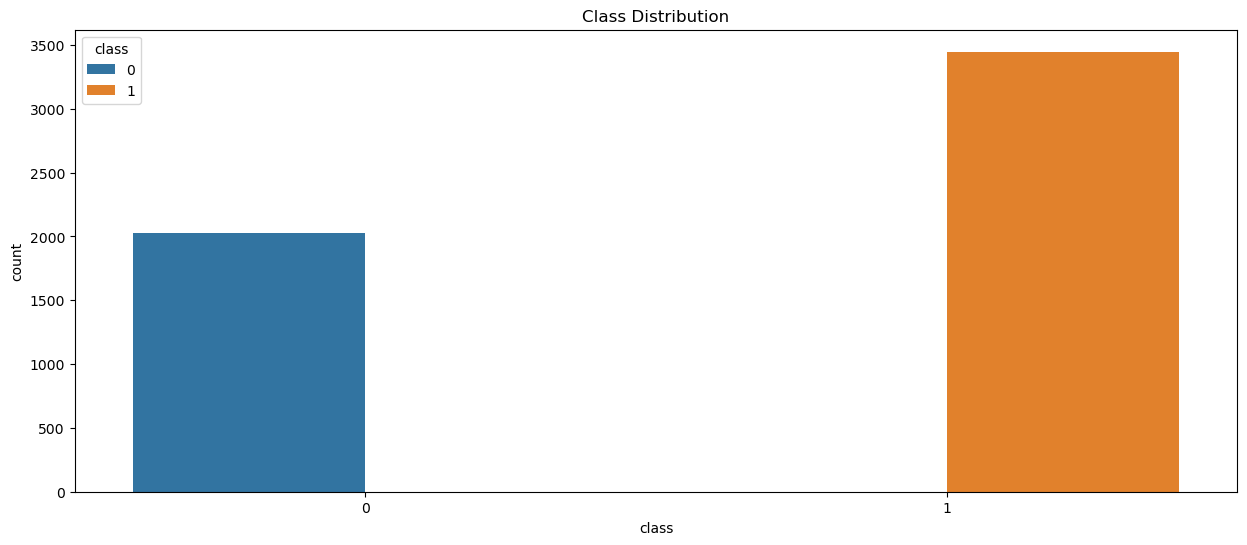

In [33]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="class", hue='class') #Categorical Variables
plt.title("Class Distribution")
plt.show()

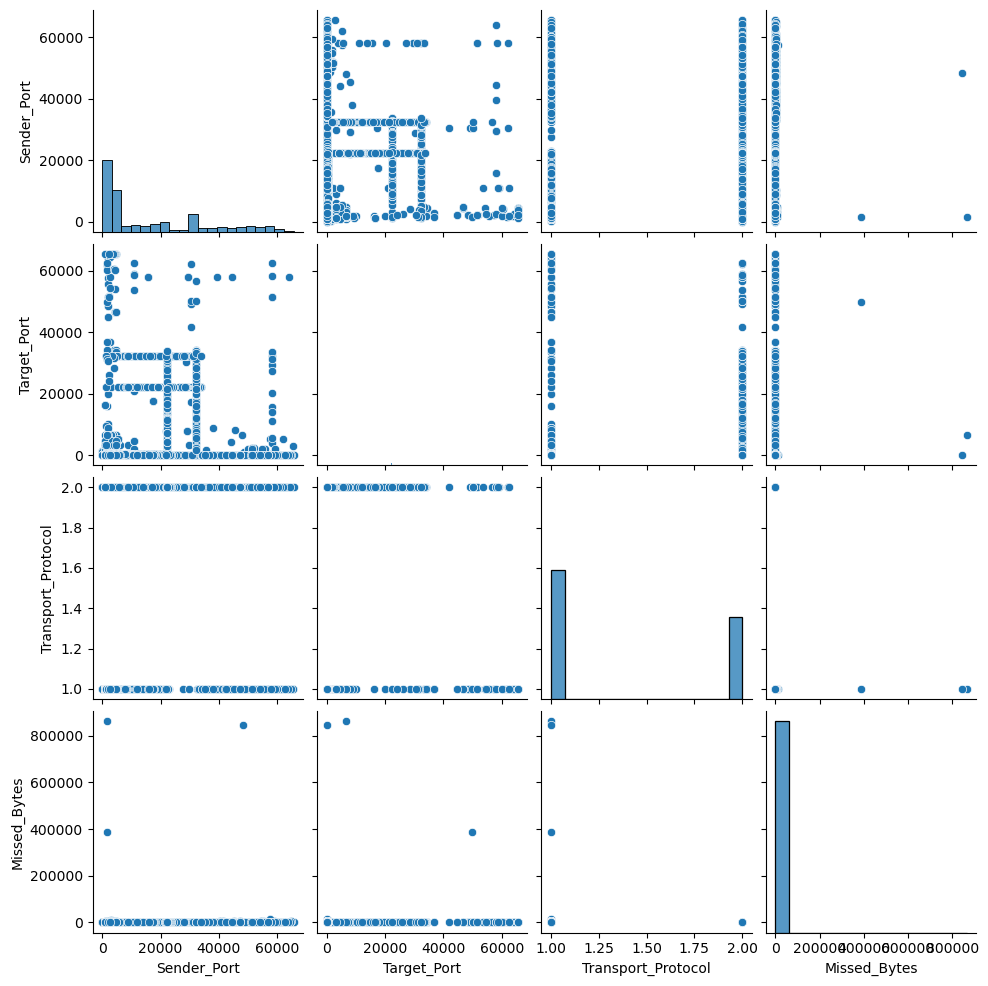

In [34]:
# Create a pair plot to visualize pairwise relationships between selected columns
sns.pairplot(df[["Sender_Port", "Target_Port", "Transport_Protocol", "Missed_Bytes"]])

# Display the pair plot
plt.show()

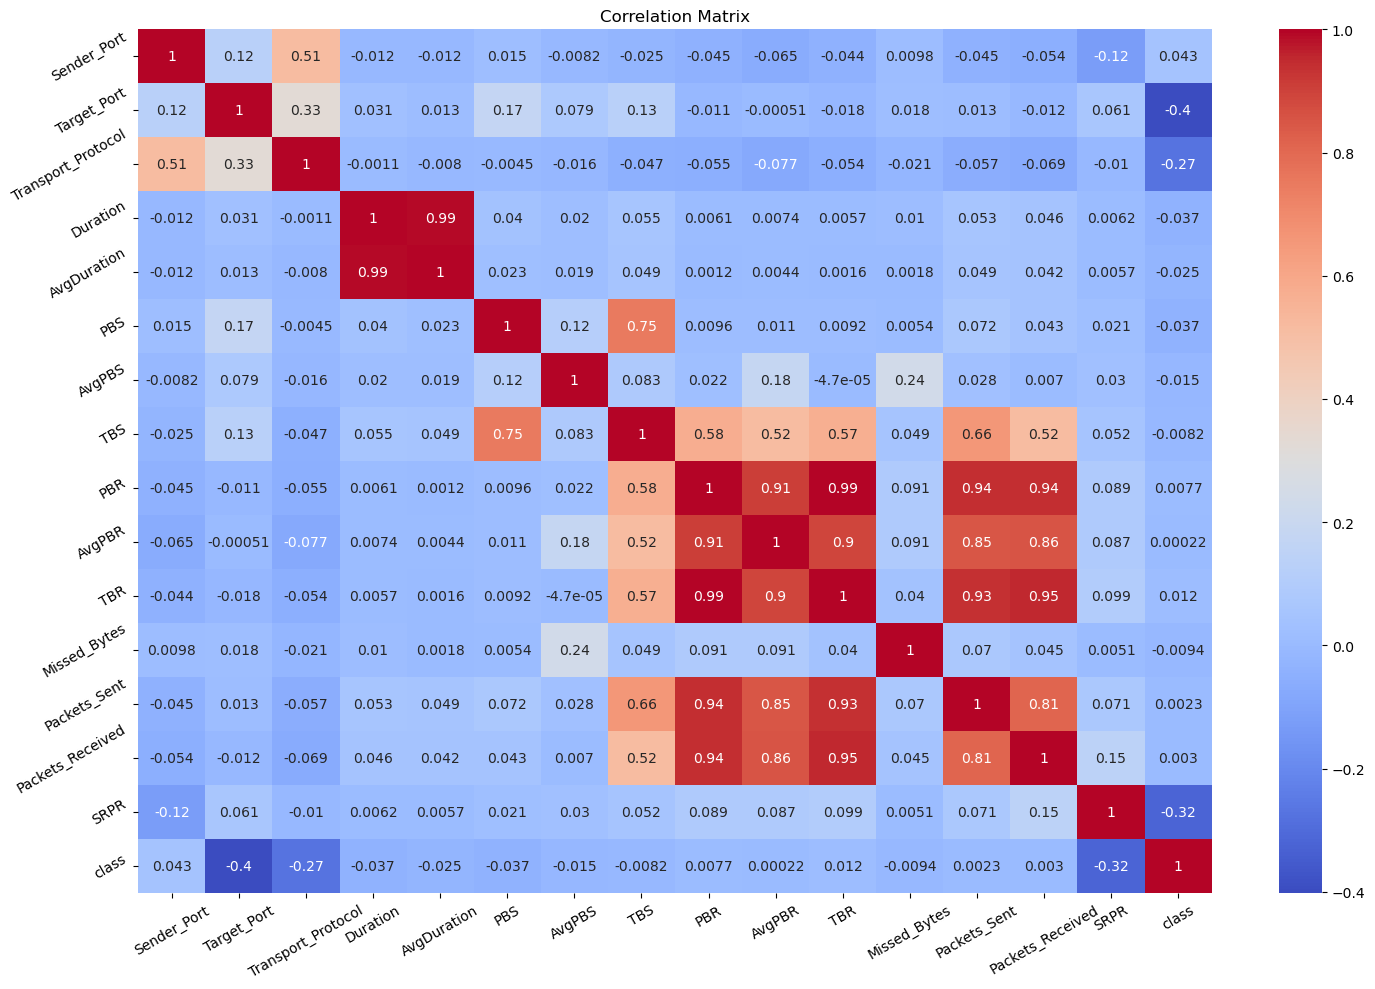

In [35]:
# Create a heatmap to visualize the correlation matrix of numeric columns in the DataFrame

plt.figure(figsize=(15, 10))  # Set the figure size for better visualization
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  # Use Seaborn to create a heatmap with correlation values annotated
plt.title("Correlation Matrix")  # Set the title of the plot
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.yticks(rotation=30)  # Rotate y-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the heatmap

In [36]:
df.head()

,ID,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,10.42.0.211-104.97.95.172-59522-80-6,192.168.2.112,2142,75.126.101.175,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,216.58.217.68-10.42.0.211-443-59345-6,147.32.84.170,2108,208.100.48.73,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1
2,10.42.0.151-54.192.38.7-52510-443-6,147.32.84.170,3805,125.14.233.194,22,1,0.00,1.500000,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
3,216.58.219.206-10.42.0.42-443-53294-6,147.32.84.180,3008,205.188.146.193,25,1,2.96,2.021923,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
4,10.42.0.1-10.42.0.42-53-62597-17,147.32.84.160,11697,184.173.217.40,443,1,0.15,0.159373,0,0.000000,96,0,0.00000,40,0,2,1,0.500000,1


In [37]:
#boxplot

In [38]:
max_outliers = ['Sender_Port','Target_Port','Transport_Protocol','Duration','AvgDuration','PBS','AvgPBR','TBR'
               ,'Missed_Bytes','Packets_Sent','Packets_Received','SRPR']

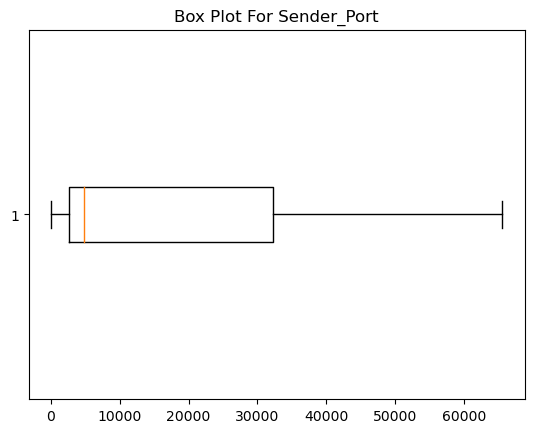

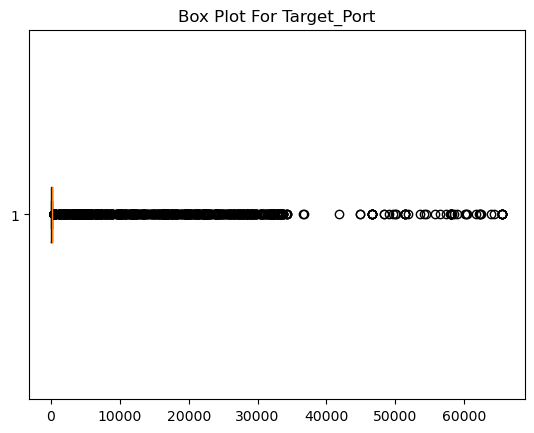

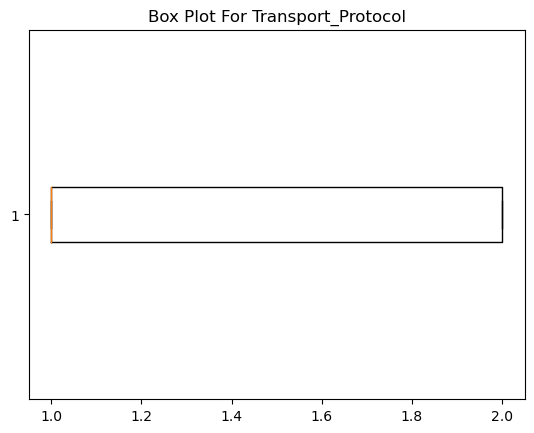

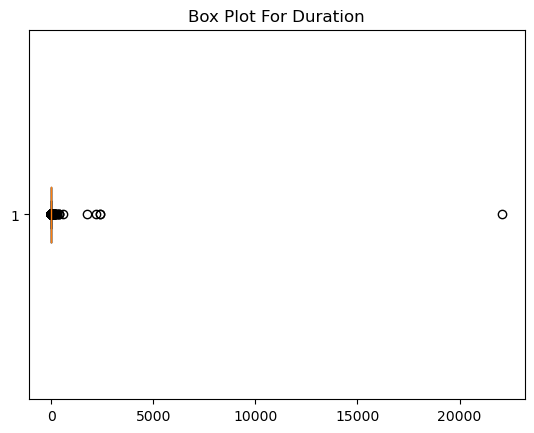

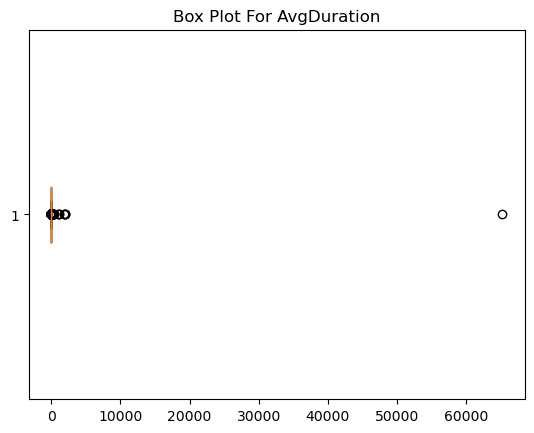

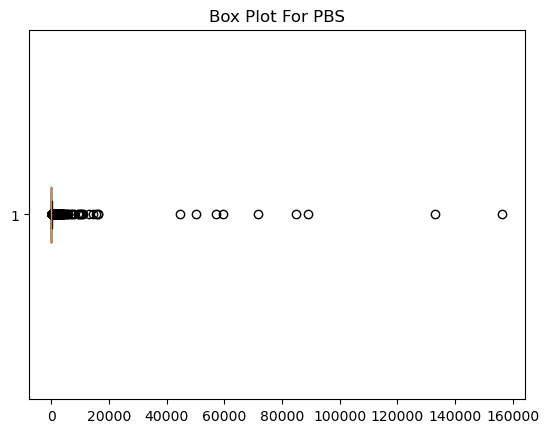

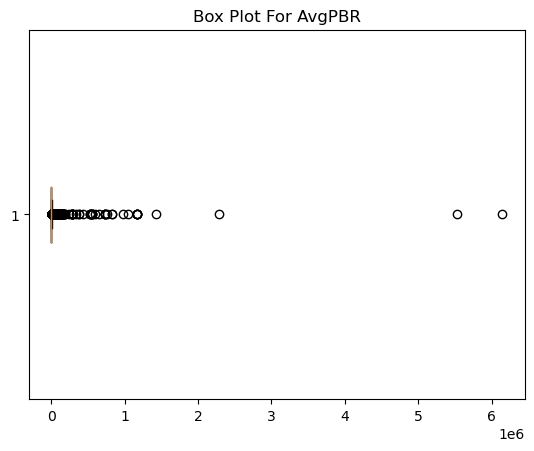

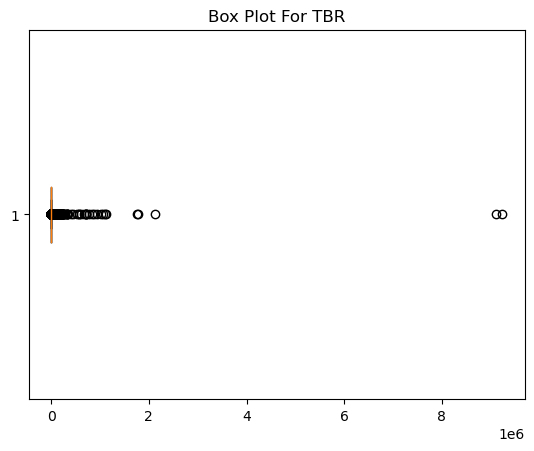

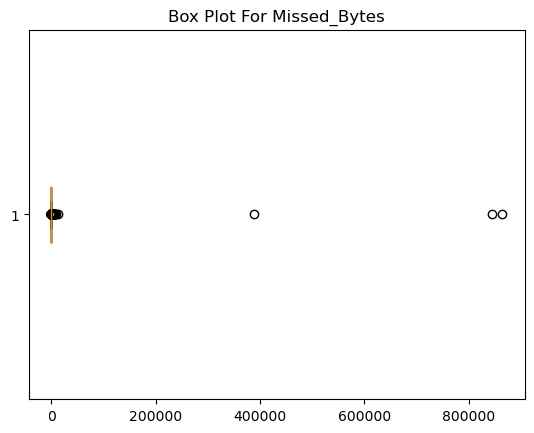

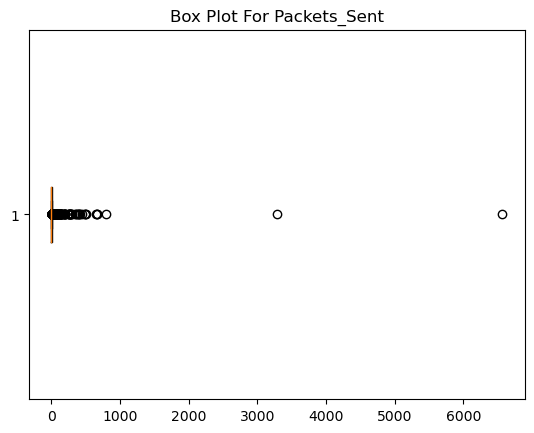

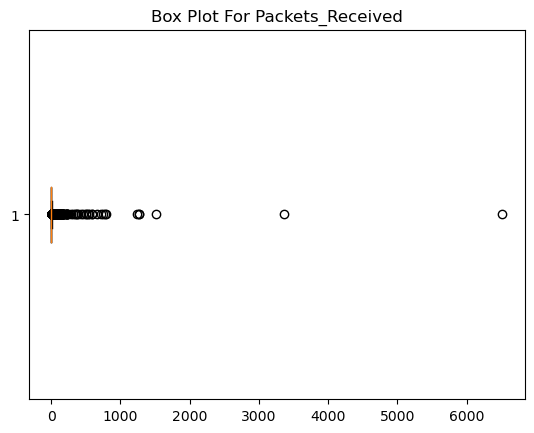

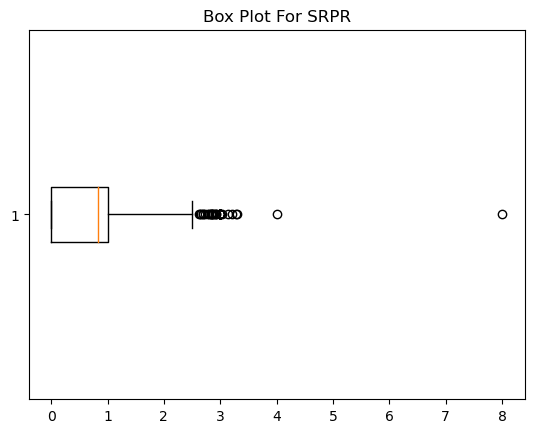

In [39]:
# Create box plots for columns with potential outliers

for column in max_outliers:
    plt.boxplot(df[column], vert=False)  # Create a horizontal box plot for the specified column
    plt.title(f'Box Plot For {column}')  # Set the title of the box plot
    plt.show()  # Display the box plot
    print('\n')  # Print a newline for better separation between box plots

In [40]:
df.head()

,ID,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,10.42.0.211-104.97.95.172-59522-80-6,192.168.2.112,2142,75.126.101.175,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,216.58.217.68-10.42.0.211-443-59345-6,147.32.84.170,2108,208.100.48.73,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1
2,10.42.0.151-54.192.38.7-52510-443-6,147.32.84.170,3805,125.14.233.194,22,1,0.00,1.500000,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
3,216.58.219.206-10.42.0.42-443-53294-6,147.32.84.180,3008,205.188.146.193,25,1,2.96,2.021923,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
4,10.42.0.1-10.42.0.42-53-62597-17,147.32.84.160,11697,184.173.217.40,443,1,0.15,0.159373,0,0.000000,96,0,0.00000,40,0,2,1,0.500000,1


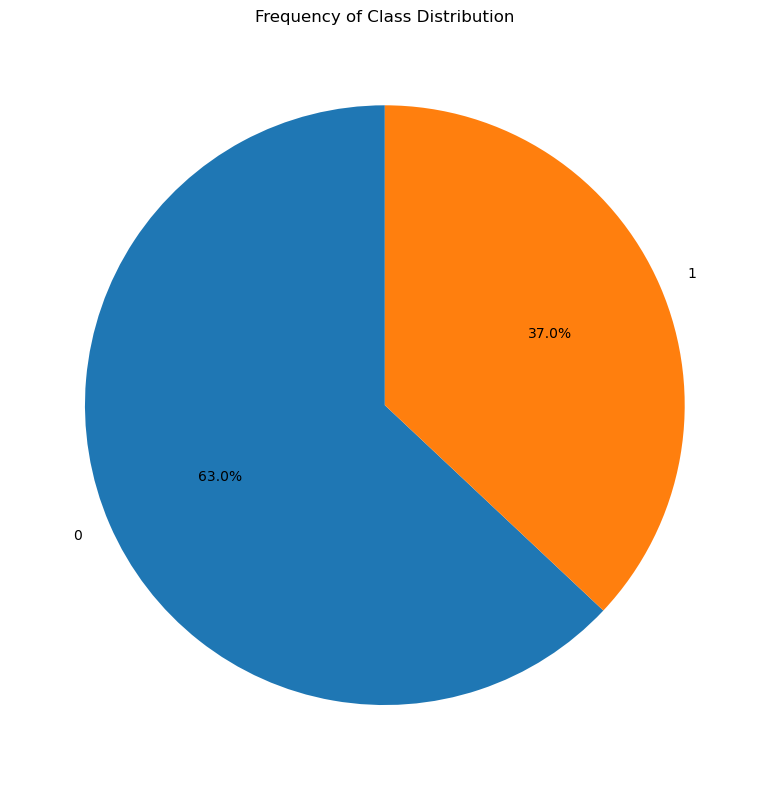

In [41]:
# Create a pie chart to visualize the distribution of classes in the 'class' column
import matplotlib.pyplot as plt  # Import the Matplotlib library

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Generate a pie chart using the values and labels from the 'class' column
ax.pie(df['class'].value_counts(), autopct='%1.1f%%', startangle=90, labels=df['class'].unique())

# Set the title of the pie chart
ax.set_title('Frequency of Class Distribution')

# Adjust layout for better spacing
plt.tight_layout()

# Display the pie chart
plt.show()

In [42]:
df.shape

(5472, 19)

#### Feature Engineering

In [43]:
# Create a copy of the original DataFrame 'df' named 'df1'
df1 = df.copy()

In [44]:
# Display the shape of the copied DataFrame 'df1' (number of rows and columns)
df1.shape

(5472, 19)

In [45]:
df1.head()

,ID,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,10.42.0.211-104.97.95.172-59522-80-6,192.168.2.112,2142,75.126.101.175,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,216.58.217.68-10.42.0.211-443-59345-6,147.32.84.170,2108,208.100.48.73,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1
2,10.42.0.151-54.192.38.7-52510-443-6,147.32.84.170,3805,125.14.233.194,22,1,0.00,1.500000,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
3,216.58.219.206-10.42.0.42-443-53294-6,147.32.84.180,3008,205.188.146.193,25,1,2.96,2.021923,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
4,10.42.0.1-10.42.0.42-53-62597-17,147.32.84.160,11697,184.173.217.40,443,1,0.15,0.159373,0,0.000000,96,0,0.00000,40,0,2,1,0.500000,1


In [46]:
#Unwanted # Drop specified columns ('ID', 'Sender_IP', 'Target_IP') from the DataFrame 'f1'
df1.drop(columns=['ID', 'Sender_IP', 'Target_IP'], inplace=True)

In [47]:
df1.head()

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,2142,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,2108,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1
2,3805,22,1,0.00,1.500000,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
3,3008,25,1,2.96,2.021923,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
4,11697,443,1,0.15,0.159373,0,0.000000,96,0,0.00000,40,0,2,1,0.500000,1


In [48]:
# Count the number of missing values in each column of the copied DataFrame 'df1'
df1.isna().sum()

Sender_Port           0
Target_Port           0
Transport_Protocol    0
Duration              0
AvgDuration           0
PBS                   0
AvgPBS                0
TBS                   0
PBR                   0
AvgPBR                0
TBR                   0
Missed_Bytes          0
Packets_Sent          0
Packets_Received      0
SRPR                  0
class                 0
dtype: int64

#### Feature Selection 

In [49]:
df1.head()

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,2142,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.72222,12462,0,18,15,0.833333,0
1,2108,22,1,3.00,1.500000,0,0.000000,192,0,0.00000,0,0,4,0,0.000000,1
2,3805,22,1,0.00,1.500000,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
3,3008,25,1,2.96,2.021923,0,0.000000,96,0,0.00000,0,0,2,0,0.000000,1
4,11697,443,1,0.15,0.159373,0,0.000000,96,0,0.00000,40,0,2,1,0.500000,1


In [50]:
df1.corr()

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
Sender_Port,1.000000,0.124804,0.513542,-0.011907,-0.012241,0.015047,-0.008215,-0.025016,-0.044665,-0.064701,-0.043742,0.009802,-0.045337,-0.053972,-0.123383,0.042804
Target_Port,0.124804,1.000000,0.331738,0.030885,0.013210,0.173476,0.079277,0.128563,-0.010766,-0.000513,-0.018215,0.018282,0.012791,-0.012357,0.061065,-0.401458
Transport_Protocol,0.513542,0.331738,1.000000,-0.001063,-0.008008,-0.004522,-0.016184,-0.047389,-0.054726,-0.076553,-0.054312,-0.021492,-0.056919,-0.068994,-0.009993,-0.272599
Duration,-0.011907,0.030885,-0.001063,1.000000,0.989114,0.039593,0.019872,0.055096,0.006106,0.007366,0.005686,0.010464,0.053390,0.045934,0.006198,-0.037100
AvgDuration,-0.012241,0.013210,-0.008008,0.989114,1.000000,0.023335,0.018573,0.049155,0.001236,0.004430,0.001633,0.001764,0.048949,0.042133,0.005702,-0.024742
PBS,0.015047,0.173476,-0.004522,0.039593,0.023335,1.000000,0.116544,0.750853,0.009603,0.011466,0.009232,0.005377,0.071862,0.043168,0.021483,-0.036707
AvgPBS,-0.008215,0.079277,-0.016184,0.019872,0.018573,0.116544,1.000000,0.082973,0.021932,0.182985,-0.000047,0.235134,0.028416,0.006953,0.030487,-0.015457
TBS,-0.025016,0.128563,-0.047389,0.055096,0.049155,0.750853,0.082973,1.000000,0.575823,0.517525,0.571466,0.049074,0.655166,0.516409,0.052335,-0.008202
PBR,-0.044665,-0.010766,-0.054726,0.006106,0.001236,0.009603,0.021932,0.575823,1.000000,0.910757,0.994614,0.091075,0.942467,0.943154,0.089188,0.007723
AvgPBR,-0.064701,-0.000513,-0.076553,0.007366,0.004430,0.011466,0.182985,0.517525,0.910757,1.000000,0.895541,0.090750,0.847780,0.856620,0.086704,0.000221


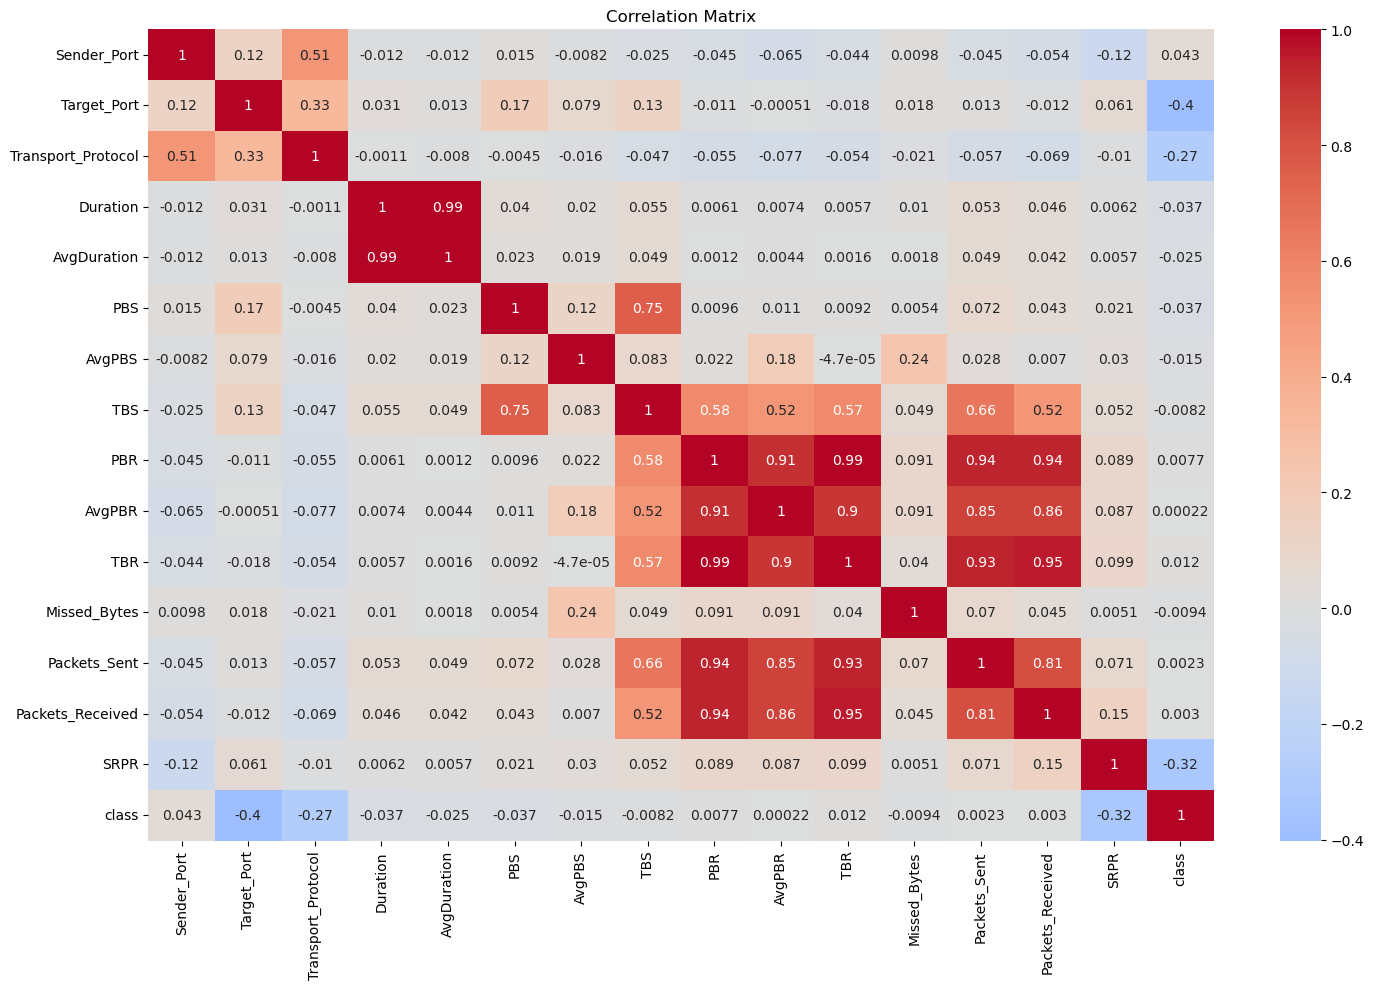

In [51]:
# Create a heatmap to visualize the correlation matrix of numeric columns in the copied DataFrame 'df1'

fig, ax = plt.subplots(figsize=(15, 10))  # Set the figure size for better visualization
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', center=0, ax=ax)  # Use Seaborn to create a heatmap with correlation values annotated
ax.set_title('Correlation Matrix')  # Set the title of the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the heatmap

#### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Split the dataset into features (x) and target variable (y), and further into training and testing sets

x = df1.drop('class', axis=1)  # Features (independent variables) excluding the 'class' column
y = df1['class']  # Target variable (dependent variable)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# test_size=0.2 specifies that 20% of the data will be used for testing, and random_state=42 ensures reproducibility

#### Model Training

In [54]:
# Create a Random Forest Classifier model and fit it to the training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

#### Evaluation

##### Training

In [55]:
# Make predictions on the training data using the trained Random Forest model
y_pred = rf_model.predict(x_train)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred)
print('Confusion Matrix\n\n', cnf_matrix)

# Generate a classification report
clf_report = classification_report(y_train, y_pred)
print('\nClassification Report\n\n', clf_report)

# Calculate the accuracy of the model on the training data
accuracy = accuracy_score(y_train, y_pred)
print('Accuracy Model', round(accuracy, 2))

Confusion Matrix

 [[1618    0]
 [   0 2759]]

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1618
           1       1.00      1.00      1.00      2759

    accuracy                           1.00      4377
   macro avg       1.00      1.00      1.00      4377
weighted avg       1.00      1.00      1.00      4377

Accuracy Model 1.0


##### Testing

In [56]:
# Make predictions on the testing data using the trained Random Forest model
y_pred = rf_model.predict(x_test)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n\n', cnf_matrix)

# Generate a classification report
clf_report = classification_report(y_test, y_pred)
print('\nClassification Report\n\n', clf_report)

# Calculate the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Model', round(accuracy, 2))

Confusion Matrix

 [[339  68]
 [ 52 636]]

Classification Report

               precision    recall  f1-score   support

           0       0.87      0.83      0.85       407
           1       0.90      0.92      0.91       688

    accuracy                           0.89      1095
   macro avg       0.89      0.88      0.88      1095
weighted avg       0.89      0.89      0.89      1095

Accuracy Model 0.89


#### Hyperparameter Tuning

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [58]:
param_grid_1 = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [59]:
# Perform a Grid Search to find the best hyperparameters for the RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_1)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)


In [60]:
#Training model on Hyperparamter
rf_model = RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)

In [61]:
y_pred = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print('Confusion Matrix\n\n', cnf_matrix)

clf_report = classification_report(y_train, y_pred)
print('\nClassification Report\n\n', clf_report)

accuracy = accuracy_score(y_train, y_pred)
print('Accuracy Model', round(accuracy, 2))

Confusion Matrix

 [[1062  556]
 [ 163 2596]]

Classification Report

               precision    recall  f1-score   support

           0       0.87      0.66      0.75      1618
           1       0.82      0.94      0.88      2759

    accuracy                           0.84      4377
   macro avg       0.85      0.80      0.81      4377
weighted avg       0.84      0.84      0.83      4377

Accuracy Model 0.84


In [62]:
y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n\n', cnf_matrix)

clf_report = classification_report(y_test, y_pred)
print('\nClassification Report\n\n', clf_report)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Model', round(accuracy, 2))

Confusion Matrix

 [[289 118]
 [ 48 640]]

Classification Report

               precision    recall  f1-score   support

           0       0.86      0.71      0.78       407
           1       0.84      0.93      0.89       688

    accuracy                           0.85      1095
   macro avg       0.85      0.82      0.83      1095
weighted avg       0.85      0.85      0.84      1095

Accuracy Model 0.85
